# EDA on Data Science Salaries

## About Dataset
**Data Science Job Salaries Dataset contains 11 columns, each are:**

* work_year: The year the salary was paid.

* experience_level: The experience level in the job during the year

* employment_type: The type of employment for the role

* job_title: The role worked in during the year.

* salary: The total gross salary amount paid.

* salary_currency: The currency of the salary paid as an ISO 4217 currency code.

* salaryinusd: The salary in USD

* employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.

* remote_ratio: The overall amount of work done remotely

* company_location: The country of the employer's main office or contracting branch

* company_size: The median number of people that worked for the company during the year


## Importing Libraries

In [1]:
!pip install country_converter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 4.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import country_converter as coco
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
import nltk

%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

## Loading Dataset

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ds_salaries.csv")

In [5]:
df.head(7)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L


In [6]:
df.shape

(3755, 11)

In [7]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [9]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [10]:
df.drop_duplicates(subset=None, keep='last', inplace=True)

In [11]:
df.shape

(2584, 11)

Renaming categorical variables for better understanding

In [12]:
df['experience_level'] = df['experience_level'].replace({'SE':'Senior', 'MI':'Mid-level', 'EN':'Entry-level','EX':'Executive-level'})
df['employment_type'] = df['employment_type'].replace({'FT':'Full-time', 'CT':'Contractual','PT':'Part-time', 'FL':'Freelancer'})
df['remote_ratio'] = df['remote_ratio'].replace({100: 'On-site', 0:'Remote', 50:'Hybrid'})

In [13]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full-time,Principal Data Scientist,80000,EUR,85847,ES,On-site,ES,L
1,2023,Mid-level,Contractual,ML Engineer,30000,USD,30000,US,On-site,US,S
2,2023,Mid-level,Contractual,ML Engineer,25500,USD,25500,US,On-site,US,S
3,2023,Senior,Full-time,Data Scientist,175000,USD,175000,CA,On-site,CA,M
4,2023,Senior,Full-time,Data Scientist,120000,USD,120000,CA,On-site,CA,M


Dropping unnecessary columns

In [14]:
df = df.drop(['salary_currency', 'salary'], axis=1)

In [15]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full-time,Principal Data Scientist,85847,ES,On-site,ES,L
1,2023,Mid-level,Contractual,ML Engineer,30000,US,On-site,US,S
2,2023,Mid-level,Contractual,ML Engineer,25500,US,On-site,US,S
3,2023,Senior,Full-time,Data Scientist,175000,CA,On-site,CA,M
4,2023,Senior,Full-time,Data Scientist,120000,CA,On-site,CA,M


In [16]:
df.shape

(2584, 9)

## Understanding the data

In [17]:
df['work_year'].value_counts()

2023    1156
2022    1125
2021     228
2020      75
Name: work_year, dtype: int64

In [18]:
df['experience_level'].value_counts()

Senior             1554
Mid-level           664
Entry-level         270
Executive-level      96
Name: experience_level, dtype: int64

In [19]:
df.columns.tolist()

['work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'salary_in_usd',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_size']

## Visualization

### WordCloud of Job Designations

In [20]:
freq_df = df['job_title'].value_counts()

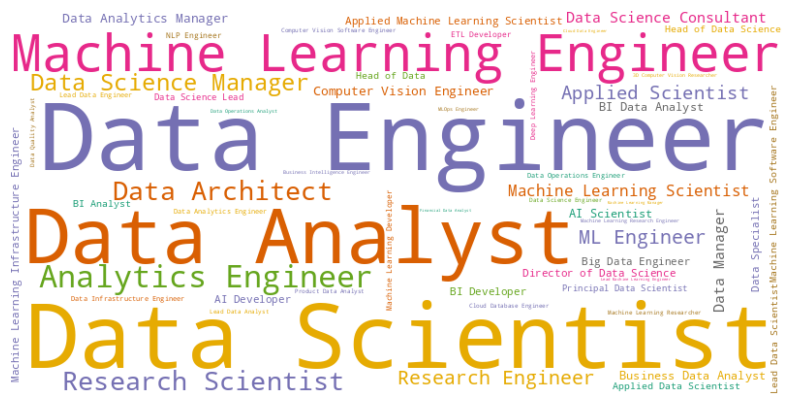

In [21]:
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Dark2')
wordcloud.generate_from_frequencies(freq_df)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Top 10 Highest Paying Jobs

In [22]:
top_10_jobs = df.groupby('job_title')['salary_in_usd'].mean().nlargest(10).to_frame()
top_10_jobs.columns = ['Salary (USD)']
top_10_jobs = top_10_jobs.rename_axis('Job')

In [23]:
top_10_jobs

,Salary (USD)
Job,
Data Science Tech Lead,375000.000000
Cloud Data Architect,250000.000000
Data Lead,212500.000000
Data Analytics Lead,211254.500000
Principal Data Scientist,198171.125000
Director of Data Science,195140.727273
Principal Data Engineer,192500.000000
Machine Learning Software Engineer,192420.000000
Applied Scientist,190342.580645


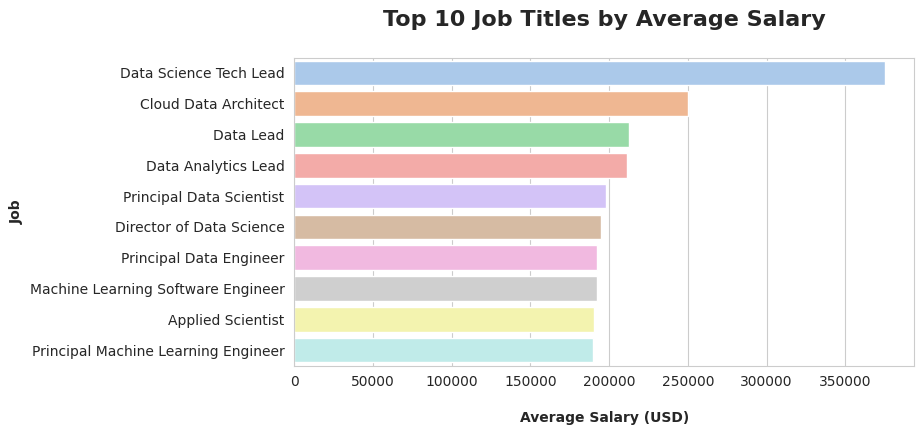

In [24]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,4))
sns.barplot(x='Salary (USD)', y=top_10_jobs.index, data=top_10_jobs, palette='pastel')
plt.title('Top 10 Job Titles by Average Salary\n',fontsize=16,fontweight='bold')
plt.xlabel('\nAverage Salary (USD)',fontweight='bold')
plt.ylabel('Job',fontweight='bold')
plt.show()

### Salary Distribution

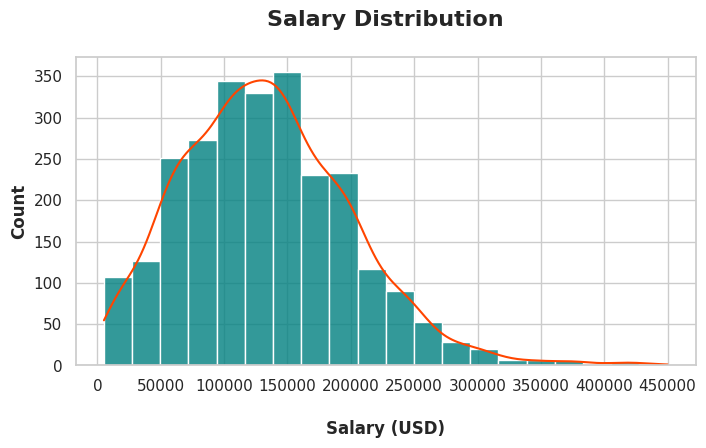

In [25]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,4))

ax = sns.histplot(df['salary_in_usd'], alpha=0.8, color="teal", bins=20,
                  kde=True)

plt.xticks(range(0,500000,50000));
plt.title("Salary Distribution\n", fontsize=16, fontweight = "bold")
plt.xlabel('\nSalary (USD)',fontweight = "bold")
plt.ylabel('Count',fontweight = "bold")
ax.lines[0].set_color('orangered')

### Work year Distribution

In [26]:
work_year_counts = df['work_year'].value_counts()

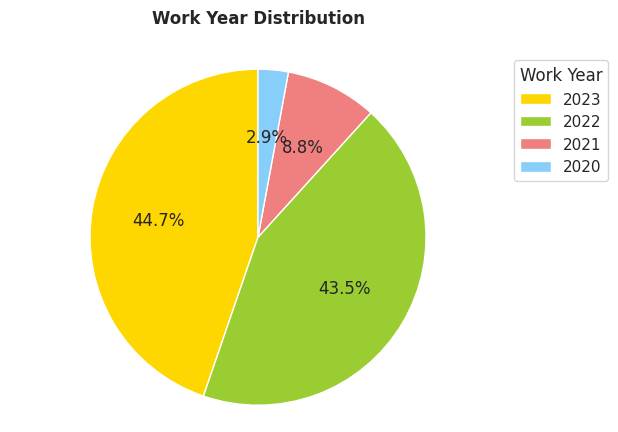

In [27]:
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red', 'purple', 'orange', 'pink']
fig, ax = plt.subplots()
ax.pie(work_year_counts, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Work Year Distribution\n',fontweight = 'bold')
plt.legend(labels=work_year_counts.index, title='Work Year', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

### Salary based on Employement Type

In [28]:
avg_salary_by_employment_type = df.groupby('employment_type')['salary_in_usd'].mean().sort_values(ascending=False)

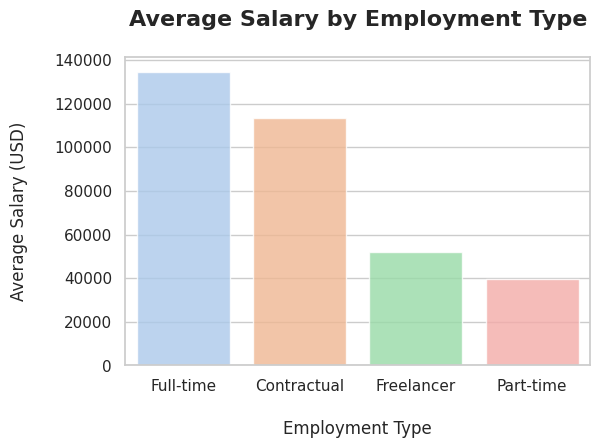

In [29]:
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_salary_by_employment_type.index, y=avg_salary_by_employment_type, palette='pastel', alpha=0.8)
plt.title('Average Salary by Employment Type\n', fontsize=16, fontweight='bold')
plt.xlabel('\nEmployment Type')
plt.ylabel('Average Salary (USD)\n')
plt.show()

### Comapany size and Average Salaries

In [30]:
avg_salary_by_company_size = df.groupby('company_size')['salary_in_usd'].mean().sort_values(ascending=False)

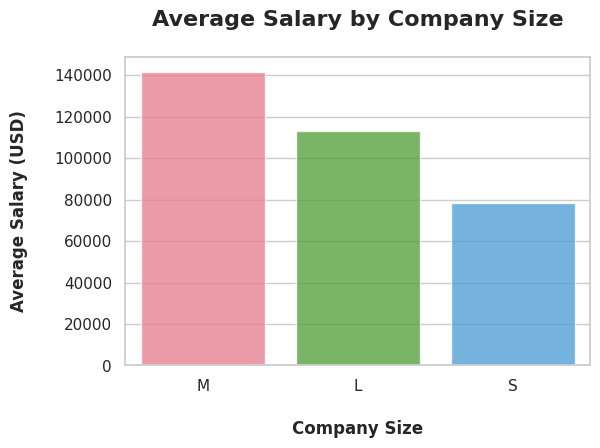

In [31]:
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_salary_by_company_size.index, y=avg_salary_by_company_size, palette='husl', alpha=0.8)
plt.title('Average Salary by Company Size\n', fontsize=16, fontweight='bold')
plt.xlabel('\nCompany Size', fontweight='bold')
plt.ylabel('Average Salary (USD)\n', fontweight='bold')
plt.show()

### Experience Level and Salary

In [32]:
avg_salary_by_exp = df.groupby('experience_level')['salary_in_usd'].mean().reset_index()

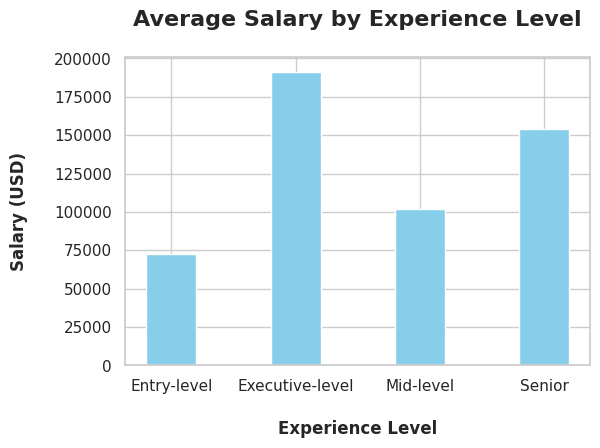

In [33]:
# Create a bar plot
plt.figure(figsize=(6, 4))
bar_width = 0.4
x_pos = range(len(avg_salary_by_exp['experience_level']))
plt.bar(x=x_pos, height=avg_salary_by_exp['salary_in_usd'], width=bar_width, color='skyblue')

# Set the x-ticks and x-tick labels
plt.xticks(x_pos, avg_salary_by_exp['experience_level'])

# Set the axis labels and title
plt.xlabel('\nExperience Level', fontweight='bold')
plt.ylabel('Salary (USD)\n', fontweight='bold')
plt.title('Average Salary by Experience Level\n', fontweight='bold', fontsize=16)

# Show the plot
plt.show()

## Predictive Analysis

### Handling Categorical Variables

In [34]:
# Create a DataFrame for the target variable
y = df['salary_in_usd']

# Create a DataFrame for the predictor variables
X = df.drop('salary_in_usd', axis=1)

In [35]:
print("Shape of feature vector", X.shape)
print("Shape of label vector", y.shape)

Shape of feature vector (2584, 8)
Shape of label vector (2584,)


In [36]:
X.head()

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full-time,Principal Data Scientist,ES,On-site,ES,L
1,2023,Mid-level,Contractual,ML Engineer,US,On-site,US,S
2,2023,Mid-level,Contractual,ML Engineer,US,On-site,US,S
3,2023,Senior,Full-time,Data Scientist,CA,On-site,CA,M
4,2023,Senior,Full-time,Data Scientist,CA,On-site,CA,M


In [37]:
# Perform one-hot encoding on the predictor variables
X_encoded = pd.get_dummies(X)

In [38]:
print("Shape of feature vector", X_encoded.shape)

Shape of feature vector (2584, 258)


In [39]:
X_encoded.head()

,work_year,experience_level_Entry-level,experience_level_Executive-level,experience_level_Mid-level,experience_level_Senior,employment_type_Contractual,employment_type_Freelancer,employment_type_Full-time,employment_type_Part-time,job_title_3D Computer Vision Researcher,...,company_location_SI,company_location_SK,company_location_TH,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_L,company_size_M,company_size_S
0,2023,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2023,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2023,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,2023,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2023,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


### Splitting training and testing data

In [40]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=0)

### Choosing the right ML model

In [41]:
models = {'Random Forest': RandomForestRegressor(random_state=0),
          'Decision Tree': DecisionTreeRegressor(random_state=0),
          'Support Vector Machine': SVR()}


for name, model in models.items():

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)


    print(f'{name}: MSE = {mse:.2f}, MAE = {mae:.2f}, R^2 = {r2:.2f}')

Random Forest: MSE = 2447240858.51, MAE = 36262.92, R^2 = 0.45
Decision Tree: MSE = 2931111948.19, MAE = 39674.65, R^2 = 0.34
Support Vector Machine: MSE = 4474673840.01, MAE = 52507.68, R^2 = -0.00


### Tuning the hyperparameters of Random Forest

In [42]:
rf = RandomForestRegressor(random_state=0)

# Define the hyperparameter grid
param_grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [None, 10, 20, 30],
              'min_samples_split': [2, 5, 10]}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f'Best hyperparameters: {grid_search.best_params_}')

Best hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}


In [43]:
rf_best = RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=50, random_state=0)

rf_best.fit(X_train, y_train)

y_pred = rf_best.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Random Forest (tuned): MSE = {mse:.2f}, MAE = {mae:.2f}, R^2 = {r2:.2f}')

Random Forest (tuned): MSE = 2423327014.58, MAE = 36465.12, R^2 = 0.46
